In [1]:
%run connect4.py

In [2]:
REPETITIONS = 12

In [3]:
import argparse
import sys
import os
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
from bots import *
from board import *
from connect4 import connect4
bot_map = {
    'random': RandomBot,
    'onestep': OneStepLookAheadBot,
    'minimax': MiniMaxBot,
    'expectimax': ExpectiMaxBot,
    'montecarlo': MonteCarloBot
}

name_map = {
    'random': 'Random Bot',
    'onestep': 'One Step Look Ahead Bot',
    'minimax': 'MiniMax Bot',
    'expectimax': 'ExpectiMax Bot',
    'montecarlo': 'Monte Carlo Tree Search Bot'
}

board = Board(1)

def str2bool(v):
    if isinstance(v, bool):
       return v
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

In [4]:
bot_map

{'random': bots.random.RandomBot,
 'onestep': bots.onesteplook.OneStepLookAheadBot,
 'minimax': bots.minimax.MiniMaxBot,
 'expectimax': bots.expectimax.ExpectiMaxBot,
 'montecarlo': bots.montecarlo.MonteCarloBot}

In [5]:
p1 = bot_map['onestep'](Board.PLAYER1_PIECE)
p2 = bot_map['montecarlo'](Board.PLAYER2_PIECE)

In [6]:
connect4(p1, p2,False)

Starting game <class 'bots.onesteplook.OneStepLookAheadBot'>  vs.  <class 'bots.montecarlo.MonteCarloBot'> noise: 0.0
2 1 2 1 2 1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 3 | P2 time8.00 seconds MOVES: 4


2

In [7]:
scores = [[0 for i in range(len(bot_map))] for j in range(len(bot_map))]
scores

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [8]:

for k in range(REPETITIONS):
    for i,p1class in enumerate(bot_map.values()):
        for j,p2class in enumerate(bot_map.values()):
            p1 = p1class(Board.PLAYER1_PIECE)
            p2 = p2class(Board.PLAYER2_PIECE)
            winner = connect4(p1,p2,False)
            if winner==1:
                scores[i][j] += 1
            elif winner==2:
                scores[i][j] -= 1
    print(scores)

Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.random.RandomBot'> noise: 0.0
1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 
PLAYER 1 WINS!
P1 time: 0.00 seconds MOVES: 17 | P2 time0.00 seconds MOVES: 16
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.onesteplook.OneStepLookAheadBot'> noise: 0.0
2 1 2 1 2 1 2 1 2 1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 5 | P2 time0.00 seconds MOVES: 6
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.minimax.MiniMaxBot'> noise: 0.0
1 2 1 2 1 2 1 2 1 2 1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 6 | P2 time2.25 seconds MOVES: 6
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.expectimax.ExpectiMaxBot'> noise: 0.0
1 2 1 2 1 2 1 2 1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 5 | P2 time0.26 seconds MOVES: 5
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.montecarlo.MonteCarloBot'> noise: 0.0
1 2 1 2 1 2 1 2 
PLAYER 2 WINS!
P1 time: 0.00 

In [9]:
scores

[[0, -12, -12, -10, -12],
 [12, -2, -12, 4, -12],
 [12, 12, -12, 12, 8],
 [12, -2, -12, -12, 6],
 [12, 10, -6, -4, 2]]

In [10]:
import copy

In [11]:
scores_nonoise = np.asarray(scores)/REPETITIONS
scores_nonoise

array([[ 0.        , -1.        , -1.        , -0.83333333, -1.        ],
       [ 1.        , -0.16666667, -1.        ,  0.33333333, -1.        ],
       [ 1.        ,  1.        , -1.        ,  1.        ,  0.66666667],
       [ 1.        , -0.16666667, -1.        , -1.        ,  0.5       ],
       [ 1.        ,  0.83333333, -0.5       , -0.33333333,  0.16666667]])

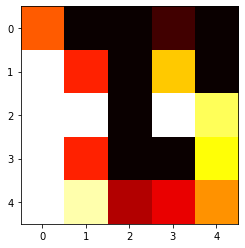

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(scores_nonoise, cmap='hot', interpolation='nearest')
plt.show()

## Now with noise

In [17]:
REPETITION = 8
scores = [[0 for i in range(len(bot_map))] for j in range(len(bot_map))]
NOISE = 0.3 
for k in range(REPETITIONS):
    for i,p1class in enumerate(bot_map.values()):
        for j,p2class in enumerate(bot_map.values()):
            p1 = p1class(Board.PLAYER1_PIECE)
            p2 = p2class(Board.PLAYER2_PIECE)
            winner = connect4(p1,p2,False, noise= NOISE)
            if winner==1:
                scores[i][j] += 1
            elif winner==2:
                scores[i][j] -= 1
    print(scores)

Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.random.RandomBot'> noise: 0.3
1 2 *1 *2 1 *2 1 2 1 *2 1 2 *1 2 1 *2 1 2 *1 *2 *1 *2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 11 | P2 time0.01 seconds MOVES: 11
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.onesteplook.OneStepLookAheadBot'> noise: 0.3
1 2 1 *2 1 2 1 2 1 2 *1 2 *1 *2 *1 2 1 *2 1 *2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 10 | P2 time0.01 seconds MOVES: 10
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.minimax.MiniMaxBot'> noise: 0.3
1 2 1 2 1 2 1 2 1 *2 1 *2 1 2 1 *2 1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 9 | P2 time2.78 seconds MOVES: 9
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.expectimax.ExpectiMaxBot'> noise: 0.3
*1 *2 *1 2 1 2 1 2 *1 2 *1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 6 | P2 time0.15 seconds MOVES: 6
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.montecarlo.MonteCarloBot'> noise: 0.3
*1 2 *1

[[ 0.         -0.83333333 -1.         -0.5        -1.        ]
 [ 1.          0.         -0.5        -0.16666667 -0.83333333]
 [ 1.          0.83333333 -0.33333333  0.83333333 -0.33333333]
 [ 0.83333333 -0.16666667 -0.66666667 -0.5         0.        ]
 [ 1.          0.83333333 -0.33333333  0.         -0.16666667]]


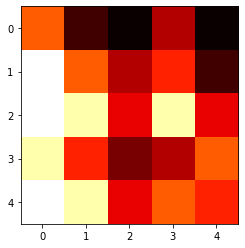

In [14]:
scores_noise = np.asarray(scores)/REPETITIONS
print(scores_noise)
plt.imshow(scores_noise, cmap='hot', interpolation='nearest')
plt.show()

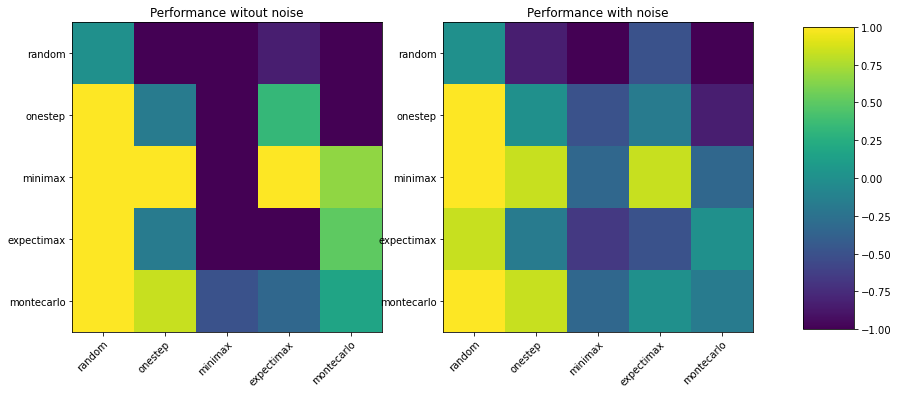

In [15]:
fig ,(ax0, ax) = plt.subplots(1,2 , figsize = (14,6))
heatmap = ax.imshow(scores_noise)
ax.set_title("Performance with noise")
 
bot_names = bot_map.keys()
ax.set_xticks(np.arange(len(bot_names)), labels=bot_names)
ax.set_yticks(np.arange(len(bot_names)), labels=bot_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

heatmap = ax0.imshow(scores_nonoise)
ax0.set_title("Performance witout noise")
#fig.colorbar(heatmap,ax=ax0) 
bot_names = bot_map.keys()
ax0.set_xticks(np.arange(len(bot_names)), labels=bot_names)
ax0.set_yticks(np.arange(len(bot_names)), labels=bot_names)
plt.setp(ax0.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

fig.colorbar(heatmap, cax=cbar_ax)

plt.show()


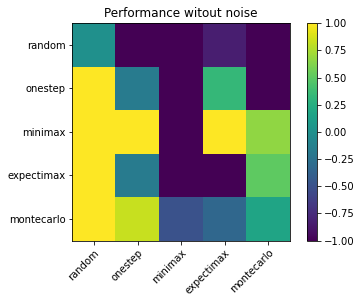

In [16]:
fig ,ax = plt.subplots()
heatmap = ax.imshow(scores_nonoise)
ax.set_title("Performance witout noise")
plt.colorbar(heatmap) 
bot_names = bot_map.keys()
ax.set_xticks(np.arange(len(bot_names)), labels=bot_names)
ax.set_yticks(np.arange(len(bot_names)), labels=bot_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()
